In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats, special, linalg
import healpy as hp
import emcee, tqdm, corner
import scipy.optimize

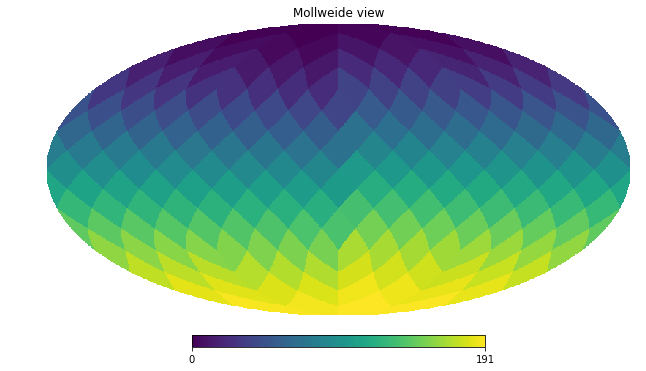

In [6]:
arr = np.arange(hp.nside2npix(4))
hp.mollview(arr)

In [93]:
nside=16
ra, dec = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)), lonlat=True)
hpx_ring_0 = np.argwhere(ra==0)

In [94]:
hpx_ring_0[:,0]

array([ 544,  672,  800,  928, 1056, 1184, 1312, 1440, 1568, 1696, 1824,
       1952, 2080, 2208, 2336, 2464])

In [95]:
len(np.unique(dec, return_counts=True)[1])

63

In [45]:
Npix_ring = np.hstack((np.arange(4,nside*4+1,4), 
                  np.zeros(nside*2-1).astype(int)+nside*4, 
                  np.arange(4,nside*4+1,4)[::-1]))

In [48]:
Npix_ring

array([ 4,  8, 12, 16, 20, 24, 28, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32, 32, 32, 28, 24, 20, 16, 12,  8,  4])

In [55]:
N_ring_pix=[]
for Nring in Npix_ring: N_ring_pix+=[Nring]*Nring
N_ring_pix=np.array(N_ring_pix)

In [54]:
N_ring_pix

[4,
 4,
 4,
 4,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 16,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 24,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 28,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 32,
 3

In [52]:
N_ring_pix

[[4, 4, 4, 4],
 [8, 8, 8, 8, 8, 8, 8, 8],
 [12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
 [16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16],
 [20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20],
 [24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24,
  24],
 [28,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  28,
  28],
 [32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32],
 [32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32,
  32],
 [32,
  32,
  32,
 

In [50]:
[Npix_ring[0]]*Npix_ring[0]

[4, 4, 4, 4]

In [98]:
nside = 32
lmax = 10
Npix = hp.nside2npix(nside)

In [57]:
# Form the l's and m's
l = np.concatenate([np.repeat(_l,2*_l+1) for _l in range(lmax+1)]).astype(np.int)
m = np.concatenate([np.arange(-_l,_l+1e-9) for _l in range(lmax+1)]).astype(np.int)
l_hp,m_hp = hp.sphtfunc.Alm.getlm(lmax=lmax)
Nmodes = int((lmax+1)**2)
Nmodes_healpy = int((lmax+1)*(lmax+2)/2)

In [127]:
# Ring idxs of pixels with phi=0
theta, phi = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)))
hpx_ring_0 = np.argwhere(phi==0)[:,0]

In [59]:
# Number of pixels in the ring of the given pixel
Npix_ring = np.hstack((np.arange(4,nside*4+1,4),
                       np.zeros(nside*2-1).astype(int)+nside*4,
                       np.arange(4,nside*4+1,4)[::-1]))

In [146]:
# Ring ID
ring_id = np.array([], dtype=int)
for i in range(4*nside-1): ring_id=np.hstack((ring_id, np.zeros(Npix_ring[i], dtype=int)+i))

In [158]:
# Minimum phi in the ring of the given pixel
ring_phi0 = scipy.stats.binned_statistic(ring_id, phi, statistic='min', bins=np.arange(nside*4)-0.5).statistic

In [119]:
# Index x of pixel in ring
ring_x = np.array([], dtype=int)
for i in range(4*nside-1): ring_x=np.hstack((ring_x, np.arange(Npix_ring[i])))

In [164]:
def gen_lambda(lmax, l, m, nside, hpx_ring_0):

    alm_hp = np.zeros(int((lmax+1)*(lmax+2)/2))
    _lambda = np.zeros((int((lmax+1)**2),nside))

    for i,(_l,_m) in enumerate(zip(tqdm.tqdm(l),m)):
        if _m > 0.0:
            hp_idx = np.where((l_hp==_l) & (m_hp == _m))[0]
            alm_hp[hp_idx] = 1.0
            _lambda[i] = hp.sphtfunc.alm2map(alm_hp+0.j*alm_hp,nside=nside,verbose=False)[hpx_ring_0]
            alm_hp[hp_idx] = 0.0
        elif _m < 0.0:
            hp_idx = np.where((l_hp==_l) & (m_hp == -_m))[0]
            alm_hp[hp_idx] = 1.0
            _lambda[i] = hp.sphtfunc.alm2map(0.*alm_hp+1.j*alm_hp,nside=nside,verbose=False)[hpx_ring_0]
            alm_hp[hp_idx] = 0.0
        else:
            hp_idx = np.where((l_hp==_l) & (m_hp == 0))[0]
            alm_hp[hp_idx] = 1.0
            _lambda[i] = hp.sphtfunc.alm2map(alm_hp+0.j*alm_hp,nside=nside,verbose=False)[hpx_ring_0]
            alm_hp[hp_idx] = 0.0

    return _lambda

def gen_exponential(lmax, npix, ring_id, ring_x, ring_phi0, N_ring):

    _exponential = np.zeros((2*lmax+1,npix)) + 0.j

    for m in range(-lmax, lmax+1):
        _exponential[m+lmax] = np.exp(1.j * (m*ring_phi0[ring_id] + 2*np.pi*m*ring_x/N_ring[ring_id]))

    return _exponential

In [167]:
_lambda = gen_lambda(lmax, l, m, nside, hpx_ring_0)

100%|██████████| 121/121 [00:00<00:00, 1486.95it/s]


In [168]:
_exponential = gen_exponential(lmax, Npix, ring_id, ring_x, ring_phi0, Npix_ring)

In [169]:
_exponential.dtype

dtype('complex128')

In [170]:
_lambda.shape

(121, 32)

In [172]:
_exponential.shape

(21, 12288)

In [173]:
nside

32

Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


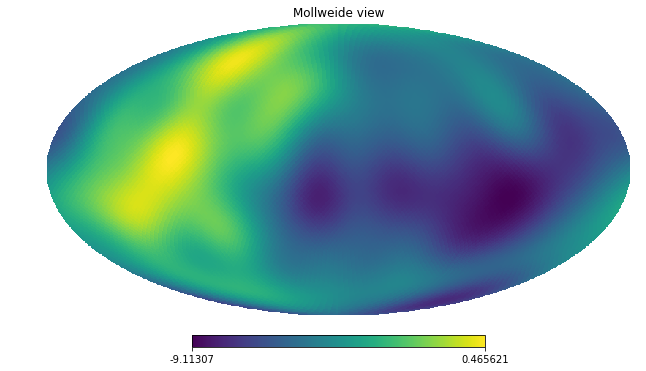

In [174]:
lmax = 10
l = hp.sphtfunc.Alm.getlm(lmax=lmax-1)[0]
scale = 10.0/(1.0+l)**2
_alm = np.random.normal(0,scale,int(lmax*(lmax+1)/2)) + 1j*np.random.normal(0,scale,int(lmax*(lmax+1)/2))
_map = hp.sphtfunc.alm2map(_alm,nside=nside)
hp.mollview(_map)

In [175]:
theta, phi = hp.pix2ang(nside, np.arange(hp.nside2npix(nside)))

In [177]:
len(np.unique(theta))

127

In [187]:
hp.nside2npix(nside)

12288

In [190]:
len(phi)/len(np.unique(phi))

6.602901665771091

In [186]:
len(np.unique(phi))

1861

In [180]:
theta

array([0.02551621, 0.02551621, 0.02551621, ..., 3.11607644, 3.11607644,
       3.11607644])

In [183]:
m=5; l=10; 
scipy.special.sph_harm(m, l, np.unique(theta)*0., np.unique(theta))

array([-3.79083732e-07+0.j, -1.20371357e-05+0.j, -9.02327952e-05+0.j,
       -3.73398161e-04+0.j, -1.11311530e-03+0.j, -2.69113186e-03+0.j,
       -5.62065207e-03+0.j, -1.05303519e-02+0.j, -1.81309376e-02+0.j,
       -2.91655111e-02+0.j, -4.43464260e-02+0.j, -6.42826293e-02+0.j,
       -8.94025787e-02+0.j, -1.19878643e-01+0.j, -1.55559335e-01+0.j,
       -1.95915762e-01+0.j, -2.40008284e-01+0.j, -2.86478491e-01+0.j,
       -3.33570334e-01+0.j, -3.79182579e-01+0.j, -4.20952766e-01+0.j,
       -4.56370680e-01+0.j, -4.82917057e-01+0.j, -4.98221052e-01+0.j,
       -5.00227944e-01+0.j, -4.87366899e-01+0.j, -4.58707425e-01+0.j,
       -4.14092589e-01+0.j, -3.54237232e-01+0.j, -2.80780422e-01+0.j,
       -1.96283146e-01+0.j, -1.04164948e-01+0.j, -1.00284269e-02+0.j,
        8.03572131e-02+0.j,  1.63119682e-01+0.j,  2.34980127e-01+0.j,
        2.93342684e-01+0.j,  3.36345998e-01+0.j,  3.62880277e-01+0.j,
        3.72573905e-01+0.j,  3.65753887e-01+0.j,  3.43384551e-01+0.j,
        3.06988905e-

In [184]:
scipy.special.sph_harm(-m, l, np.unique(theta)*0., np.unique(theta))

array([ 3.79083732e-07+0.j,  1.20371357e-05+0.j,  9.02327952e-05+0.j,
        3.73398161e-04+0.j,  1.11311530e-03+0.j,  2.69113186e-03+0.j,
        5.62065207e-03+0.j,  1.05303519e-02+0.j,  1.81309376e-02+0.j,
        2.91655111e-02+0.j,  4.43464260e-02+0.j,  6.42826293e-02+0.j,
        8.94025787e-02+0.j,  1.19878643e-01+0.j,  1.55559335e-01+0.j,
        1.95915762e-01+0.j,  2.40008284e-01+0.j,  2.86478491e-01+0.j,
        3.33570334e-01+0.j,  3.79182579e-01+0.j,  4.20952766e-01+0.j,
        4.56370680e-01+0.j,  4.82917057e-01+0.j,  4.98221052e-01+0.j,
        5.00227944e-01+0.j,  4.87366899e-01+0.j,  4.58707425e-01+0.j,
        4.14092589e-01+0.j,  3.54237232e-01+0.j,  2.80780422e-01+0.j,
        1.96283146e-01+0.j,  1.04164948e-01+0.j,  1.00284269e-02+0.j,
       -8.03572131e-02+0.j, -1.63119682e-01+0.j, -2.34980127e-01+0.j,
       -2.93342684e-01+0.j, -3.36345998e-01+0.j, -3.62880277e-01+0.j,
       -3.72573905e-01+0.j, -3.65753887e-01+0.j, -3.43384551e-01+0.j,
       -3.06988905e-